# Numerical Methods Final Project
## Multi-Feature Prediction with Gradient Descent on Regression
Name: Louis Widi Anandaputra

No: 22/492218/PA/21090

Data Source: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Student_Performance.csv')

def train_test_split(X,y, test_size = 0.2, random_state = 42):
    data = np.column_stack((X, y))
    
    # Shuffle the data
    np.random.seed(random_state)  # For reproducibility
    np.random.shuffle(data)
    
    # Determine the split index
    train_size = int((1-test_size) * len(data))
    
    # Split the data into training and testing sets
    train_data = data[:train_size]
    test_data = data[train_size:]
    
    # Separate the features and target variable
    X_train = train_data[:, :-1]
    y_train = train_data[:, -1]
    X_test = test_data[:, :-1]
    y_test = test_data[:, -1]
    
    return X_train, y_train, X_test, y_test
    
def MSE(preds, y):
    return np.mean((preds - y) ** 2)
    
def RMSE(preds, y):
    return (MSE(preds, y )** 0.5)

def lin_predict(x, weight, bias):
    return np.dot(x,weight) + bias
    
def poly_predict(x, weight, order, bias):
    x_safe_power = np.where(x == 0, np.finfo(float).eps, x)
    x_powered = np.array(x_safe_power)**np.array(order)
    return np.dot(x_powered,weight) + bias
    
def visualize(weights, costs, viz = False):
    if viz == True:
        plt.figure(figsize = (8,6))
        plt.plot(weights, costs)
        plt.scatter(weights, costs, marker='o', color='red')
        plt.title("Cost vs Weights")
        plt.ylabel("Cost")
        plt.xlabel("Weight")
        plt.show()
        
def print_history(current_cost, current_weight, current_bias, print_hist = False):
    if print_hist == True:
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")
        
def gradient_descent_linear(x,
                            y, 
                            iterations = 1000, 
                            learning_rate = 0.0001, 
                            stopping_threshold = 1e-6, 
                            viz = False, 
                            print_hist = False):
    
    # Initializing weight, bias, learning rate and iterations
	current_weight = [0.1] * len(x[0])
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	weights = []
	previous_cost = None
	
	# Estimation of optimal parameters 
	for i in range(iterations):
		
		# Making predictions
		y_predicted = lin_predict(x, current_weight, current_bias)
		
		# Calculating the current cost
		current_cost = MSE(y, y_predicted)

		# If the change in cost is less than or equal to 
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)
		
        # Calculating the gradients
		weight_derivative = np.dot(x.T, (y_predicted-y)) * ((2/n))
		bias_derivative = np.sum(y_predicted-y) * ((2/n))
		
		# Updating weights and bias
		current_weight = np.array(current_weight) - np.array((learning_rate * weight_derivative))
		current_bias = current_bias - (learning_rate * bias_derivative)
				
		# Printing the parameters for each 1000th iteration
		print_history(current_cost, current_weight, current_bias, print_hist)
	
	
	# Visualizing the weights and cost at for all iterations\
	visualize(weights, costs, viz)
	
	return current_weight, current_bias

def gradient_descent_poly(x,
                          y, 
                          iterations = 1000, 
                          learning_rate = 0.0001, 
                          stopping_threshold = 1e-6, 
                          viz = False, 
                          print_hist = False):
    # Initialization
    current_weight = np.array([0.1] * x.shape[1])
    current_order = np.array([1.0] * x.shape[1])
    current_bias = 0.01
    n = float(len(x))
    iterations = iterations
    learning_rate = learning_rate

    costs = []
    weights = []
    orders = []
    biases = []
    previous_cost = None
    
    for i in range(iterations):
        y_predicted = poly_predict(x, current_weight, current_order, current_bias)

        current_cost = MSE(y, y_predicted)

        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)
        orders.append(current_order)
        biases.append(current_bias)

        x_safe = np.where(x == 0, np.finfo(float).eps, x)
        order_derivative = np.dot((np.log(x_safe) * ((x_safe**current_order))).T, (y_predicted - y)) * current_weight * (2/n)
        weight_derrivative = np.dot(x.T, (y_predicted-y)) * ((2/n))
        bias_derrivative = np.sum(y_predicted-y) * ((2/n))

        current_order = np.array(current_order) - np.array((learning_rate * order_derivative))
        current_weight = np.array(current_weight) - np.array((learning_rate * weight_derrivative))
        current_bias = current_bias - (learning_rate * bias_derrivative)

    return current_weight, current_order, current_bias
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_53609/145124838.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Extracurricular Activities' : map})


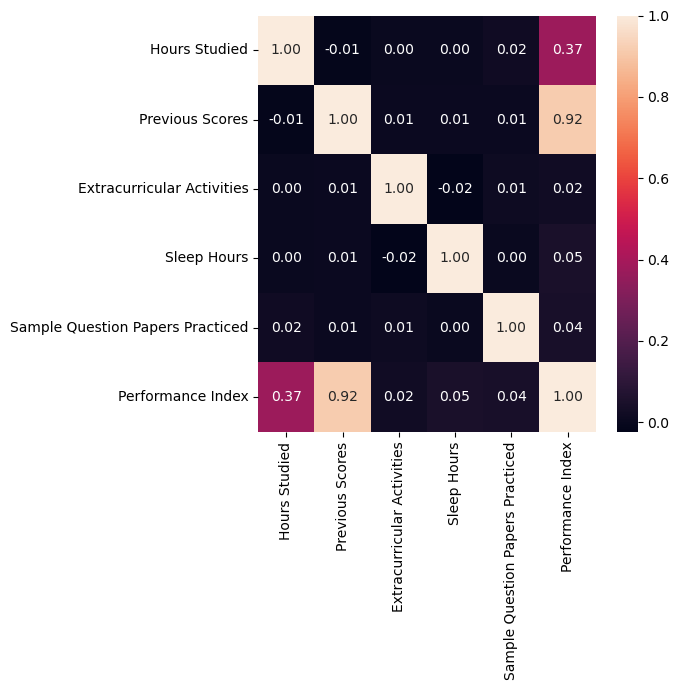

In [3]:
df = pd.read_csv('Student_Performance.csv')
map = {'Yes' : 1, 'No' : 0}
df = df.replace({'Extracurricular Activities' : map})
corr = df.corr()
# visualization of correlation relationships
plt.figure(figsize=(7, 7))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.tight_layout()
plt.savefig('corr.png');

#### Pearson Correlation
$$r = \frac {\sum{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum{(x_i-\bar{x})^2}\sum(y_i-\bar{y})^2}}$$
The correlation using Pearson's Correlation showed that performance index is most affected by Hours Studied and Previous Scores. We would pick those two features in this work



In [4]:
df = pd.read_csv('Student_Performance.csv')
X = df[['Hours Studied', 'Previous Scores']]
y = df[['Performance Index']]
X_train, y_train, X_test, y_test = train_test_split(X, y)


## Linear Regression
$$\hat{y} = \beta + \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_n x_n$$

$$n\::number\:of\:features$$

$$x\::value\:of\:the\:specific\:feature$$

$$\beta\: bias$$

$$\theta\::weight$$

$$\hat{y}\::\:predicted\:value$$

### Finding Rate of Change for Gradient Descent
#### Rate of Change on Bias
$$\frac{\partial E}{\partial \beta} = \frac{2}{m} \sum_{{i=1}}^{m}{(\hat{y}_i-y_i)}$$
#### Rate of Change on Weights
$$\begin{bmatrix} \frac{\partial{E}}{\partial{\theta_1}} \\ 
    \frac{\partial{E}}{\partial{\theta_2}} \\ 
    \vdots \\
    \frac{\partial{E}}{\partial{\theta_n}}  
    \end{bmatrix} = 
    \frac{2}{m} 
    \begin{bmatrix} \sum_{{i=1}}^{m}{(\hat{y}_i-y_i)(x_{1i})} \\ 
    \sum_{{i=1}}^{m}{(\hat{y}_i-y_i)(x_{2i})}  \\ 
    \vdots \\
    \sum_{{i=1}}^{m}{(\hat{y}_i-y_i)(x_{ni})}  \end{bmatrix}$$

### Updating the Values
#### Updating the Bias
$$\beta' = \beta - \frac{\partial E}{\partial \beta}\alpha$$
#### Updating the Weights
$$\begin{bmatrix} \theta_1' \\ 
    \theta_2' \\ 
    \vdots \\
    \theta_n'
    \end{bmatrix} = 
    \begin{bmatrix} \theta_1 \\ 
    \theta_2 \\ 
    \vdots \\
    \theta_n
    \end{bmatrix} - 
    \begin{bmatrix} \frac{\partial{E}}{\partial{\theta_1}} \\ 
    \frac{\partial{E}}{\partial{\theta_2}} \\ 
    \vdots \\
    \frac{\partial{E}}{\partial{\theta_n}}  
    \end{bmatrix}\alpha$$

In [5]:
%%time

estimated_weight, estimated_bias = gradient_descent_linear(X_train, y_train, iterations=2000, learning_rate=1e-4)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
preds_linear = lin_predict( X_test,  estimated_weight, estimated_bias)
preds_train = lin_predict(X_train, estimated_weight, estimated_bias)
print("RMSE Train: ", RMSE(preds_train, y_train))
print("RMSE of Linear Regression Gradient Descent: ",RMSE(preds_linear, y_test))

Estimated Weight: [1.70809367 0.69933541]
Estimated Bias: -0.48690356626347364
RMSE Train:  6.796740626524965
RMSE of Linear Regression Gradient Descent:  6.846577805955783
CPU times: user 3.33 s, sys: 221 ms, total: 3.55 s
Wall time: 540 ms



## Polynomial Regression
$$\hat{y} = \beta + \theta_0 X_0^{\text{a}_0} + \theta_1 X_1^{\text{a}_1} + \cdots + \theta_n X_n^{\text{a}_n}$$


$$n\::number\:of\:features$$

$$x\::value\:of\:the\:specific\:feature$$

$$\beta\: bias$$

$$\theta\::weight$$

$$a\::order$$

$$\hat{y}\::\:predicted\:value$$
### Finding Rate of Change for Gradient Descent
#### Rate of Change on Bias
$$\frac{\partial E}{\partial \beta} = \frac{2}{m} \sum_{{i=1}}^{m}{(\hat{y}_i-y_i)}$$
#### Rate of Change on Weights
$$\begin{bmatrix} \frac{\partial{E}}{\partial{\theta_1}} \\ 
    \frac{\partial{E}}{\partial{\theta_2}} \\ 
    \vdots \\
    \frac{\partial{E}}{\partial{\theta_n}}  
    \end{bmatrix} = 
    \frac{2}{m} 
    \begin{bmatrix} \sum_{{i=1}}^{m}{(\hat{y}_i-y_i)(x_{1i})} \\ 
    \sum_{{i=1}}^{m}{(\hat{y}_i-y_i)(x_{2i})}  \\ 
    \vdots \\
    \sum_{{i=1}}^{m}{(\hat{y}_i-y_i)(x_{ni})}  \end{bmatrix}$$
#### Rate of Change on Orders
$$\begin{bmatrix} \frac{\partial{E}}{\partial{a_1}} \\ 
    \frac{\partial{E}}{\partial{a_2}} \\ 
    \vdots \\
    \frac{\partial{E}}{\partial{a_n}}  
    \end{bmatrix} = 
    \frac{2}{m} 
    \begin{bmatrix}\theta_1\sum_{{i=1}}^{m}{(\hat{y}_i-y_i)({x^{a_1}_{1i}})ln(x_{1i})} \\ 
    \theta_2\sum_{{i=1}}^{m}{(\hat{y}_i-y_i)({x^{a_2}_{2i}})ln(x_{2i})}  \\ 
    \vdots \\
    \theta_n\sum_{{i=1}}^{m}{(\hat{y}_i-y_i)({x^{a_n}_{ni}})ln(x_{ni})}  \end{bmatrix}$$
### Updating the Values
#### Updating the Bias
$$\beta' = \beta - \frac{\partial E}{\partial \beta}\alpha$$
#### Updating the Weights
$$\begin{bmatrix} \theta_1' \\ 
    \theta_2' \\ 
    \vdots \\
    \theta_n'
    \end{bmatrix} = 
    \begin{bmatrix} \theta_1 \\ 
    \theta_2 \\ 
    \vdots \\
    \theta_n
    \end{bmatrix} - 
    \begin{bmatrix} \frac{\partial{E}}{\partial{\theta_1}} \\ 
    \frac{\partial{E}}{\partial{\theta_2}} \\ 
    \vdots \\
    \frac{\partial{E}}{\partial{\theta_n}}  
    \end{bmatrix}\alpha$$
#### Updating the Orders
$$\begin{bmatrix}a_1' \\ 
    a_2' \\ 
    \vdots \\
    a_n'  
    \end{bmatrix} = 
    \begin{bmatrix}a_1 \\ 
    a_2 \\ 
    \vdots \\
    a_n  
    \end{bmatrix} - 
    \begin{bmatrix} \frac{\partial{E}}{\partial{a_1}} \\ 
    \frac{\partial{E}}{\partial{a_2}} \\ 
    \vdots \\
    \frac{\partial{E}}{\partial{a_n}}  
    \end{bmatrix}\alpha$$



In [6]:
%%time
estimated_weight, estimated_order, estimated_bias = gradient_descent_poly(X_train, y_train, iterations=2000, learning_rate=1e-5)
print(f"Estimated Weight: {estimated_weight}\nEstimated Order: {estimated_order}\nEstimated Bias: {estimated_bias}\n")
preds_poly = poly_predict(X_test, estimated_weight, estimated_order, estimated_bias)
preds_train_poly = poly_predict(X_train, estimated_weight, estimated_order, estimated_bias)
print("RMSE Train: ", RMSE(preds_train_poly, y_train))
print("RMSE of Polynomial Regression Gradient Descent: ", RMSE(preds_poly, y_test))

Estimated Weight: [0.5272984  0.08493531]
Estimated Order: [1.662774  1.4826695]
Estimated Bias: -0.00024033920610194357

RMSE Train:  2.9526720557687276
RMSE of Polynomial Regression Gradient Descent:  2.9549370713151357
CPU times: user 11.8 s, sys: 2.11 s, total: 13.9 s
Wall time: 1.96 s


In [7]:
print(preds_linear)

[61.28354587 72.7018456  34.31888763 ... 48.45403931 34.08995449
 35.09871276]


In [8]:
print(preds_poly)

[60.6535857  77.45236584 25.44242814 ... 46.77101026 26.12804925
 26.46685735]


In [9]:
print(y_test)

[63. 78. 20. ... 44. 20. 24.]


In [10]:
lin_predict(np.array([X_test[0][0], X_test[0][1]]), estimated_weight, estimated_bias)

8.461415164735664

Testing Results: https://docs.google.com/spreadsheets/d/1lgyG5CXDPKZvaLBJNGuDJCP-sHzAgemR62PiendEqC8/edit?usp=sharing

In [11]:
X_test[0]

array([ 3., 81.])

## From the training process we have...
### Best model for linear regression for this dataset:
$$\hat{y} = -0.48690356626347364\; + \;1.70809367\,Hours\,Studied\; + \;0.69933541\,Previous\,Scores$$
### Best model for polynomial regression for this dataset
$$\hat{y} = -0.00024033920610194357\; + \;0.5272984\,Hours\,Studied^{1.662774}\; + \;0.08493531\,Previous\,Scores^{1.4826695}$$


<br><br><br>
© Louis Widi Anandaputra - 2024